# Case study on Pre-processing

Do the following on titanic dataset.

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

### Importing relevant libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

## 1. Load the dataset into python environment:

In [3]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Setting ‘PassengerId’ as the index column:

In [4]:
data=pd.read_csv('titanic_dataset.csv', index_col='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset:

In [6]:
data.shape

(891, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

## 4. Filling the missing values present in all the columns in the dataset:

In [13]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
data['Age']= data['Age'].fillna(data['Age'].median())
data['Age'].isnull().sum()

0

In [17]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Embarked'].isnull().sum()

0

In [19]:
data.Cabin = data.Cabin.fillna('NA')
data['Cabin'].isnull().sum()

0

In [20]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [21]:
data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## 5. Checking and handling outliers in at least 3 columns in the dataset:

### a. Age

<AxesSubplot:>

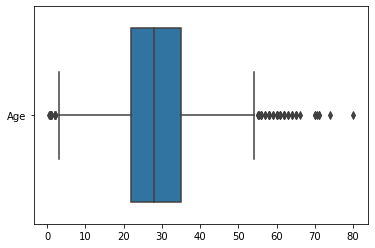

In [25]:
sns.boxplot(data=data[['Age']], orient='h')

In [26]:
Q1= np.percentile(data['Age'],25,interpolation='midpoint')
Q2= np.percentile(data['Age'],50,interpolation='midpoint')
Q3= np.percentile(data['Age'],75,interpolation='midpoint')

In [27]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [28]:
data['Age'].median()

28.0

In [29]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.5
54.5


In [30]:
outlier=[]
for x in data['Age']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [31]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [32]:
ind1= data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [33]:
ind2= data['Age']<low_lim
data.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [34]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880,8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

In [37]:
data.shape

(825, 8)

<AxesSubplot:>

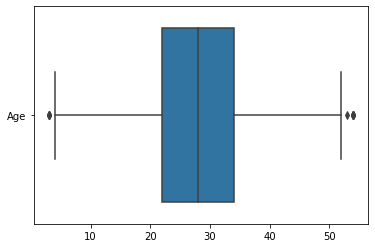

In [38]:
sns.boxplot(data=data[['Age']], orient='h')

### Insight: 

* From the figure it is clear that the outliers present in the column 'Age' has been reduced drastically. 

### b. Fare

<AxesSubplot:>

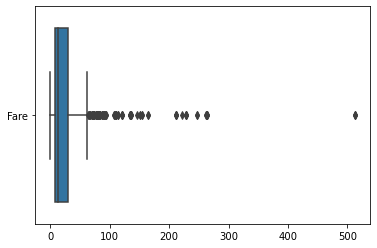

In [40]:
sns.boxplot(data=data[['Fare']], orient='h')

In [41]:
Q1= np.percentile(data['Fare'],25,interpolation='midpoint')
Q2= np.percentile(data['Fare'],50,interpolation='midpoint')
Q3= np.percentile(data['Fare'],75,interpolation='midpoint')

In [42]:
print(Q1)
print(Q2)
print(Q3)

7.8958
13.4167
30.0708


In [43]:
data['Fare'].median()

13.4167

In [44]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-25.366699999999994
63.333299999999994


In [46]:
outlier=[]
for x in data['Fare']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [51]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [48]:
ind1=data['Fare']>up_lim
data.loc[ind1].index.values


array([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98, 103, 119, 121,
       125, 140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257, 258,
       259, 263, 270, 291, 292, 300, 307, 308, 311, 312, 319, 320, 325,
       326, 333, 335, 337, 338, 342, 370, 374, 376, 378, 381, 386, 391,
       394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528,
       538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642,
       646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738,
       742, 743, 755, 760, 764, 766, 780, 790, 793, 803, 821, 836, 847,
       850, 857, 864], dtype=int64)

In [49]:
data.drop([2,  28,  32,  35,  53,  62,  63,  73,  89,  98, 103, 119, 121,
       125, 140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257, 258,
       259, 263, 270, 291, 292, 300, 307, 308, 311, 312, 319, 320, 325,
       326, 333, 335, 337, 338, 342, 370, 374, 376, 378, 381, 386, 391,
       394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528,
       538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642,
       646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738,
       742, 743, 755, 760, 764, 766, 780, 790, 793, 803, 821, 836, 847,
       850, 857, 864],inplace=True)

In [52]:
data.shape

(718, 8)

<AxesSubplot:>

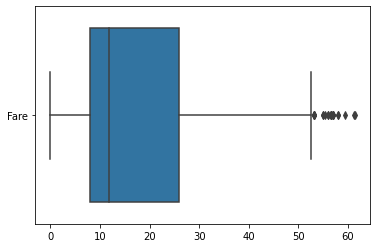

In [53]:
sns.boxplot(data=data[['Fare']], orient='h')

### Insight: 

* From the box plot it is observed that the outliers present in the column 'Fare' has been removeed.

### c. Pclass

<AxesSubplot:>

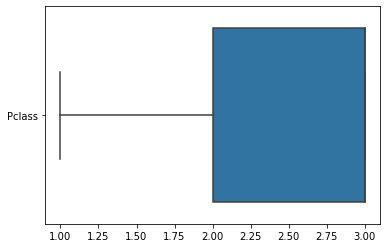

In [90]:
sns.boxplot(data=data[['Pclass']], orient='h')

### Insight: 

* There are no outliers present in the Pclass.
* Pclass refers to passenger class (1st, 2nd, 3rd)

## Encoding the categorical data present in the dataset:

### a. Label Encoding: Column 'Sex'

In [58]:
labelencoder = preprocessing.LabelEncoder()
data['Sex'] = labelencoder.fit_transform(data['Sex'])

In [59]:
data['Sex'].value_counts()

1    489
0    229
Name: Sex, dtype: int64

### b. One hot Encoding: Column 'Embarked'

In [60]:
data = pd.get_dummies(data=data, columns=['Embarked'])

In [62]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1
6,0,3,1,28.0,0,0,8.4583,0,1,0


<AxesSubplot:>

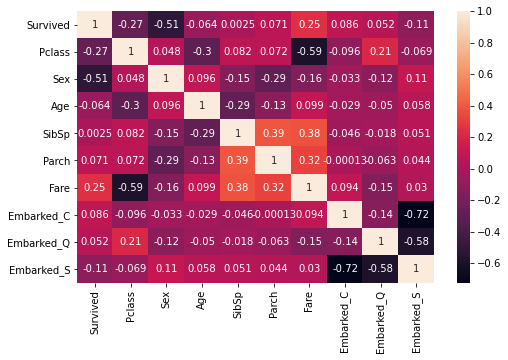

In [63]:
plt.figure(figsize=(8, 5))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

### Linear Regression Model:

In [64]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [66]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [67]:
predictions = model.predict(X_test)

In [71]:
mse_value = metrics.mean_squared_error(y_test, predictions)
mse_value

0.15083048588344095

In [87]:
r_square_value = metrics.r2_score(y_test, predictions)
r_square_value

0.3281157990807665

In [73]:
min_max = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = min_max.fit_transform(X)

In [74]:
X = pd.DataFrame(X)

In [75]:
X

,0,1,2,3,4,5,6,7,8
0,1.0,1.0,0.372549,0.2,0.000000,0.118118,0.0,0.0,1.0
1,1.0,0.0,0.450980,0.0,0.000000,0.129115,0.0,0.0,1.0
2,0.0,0.0,0.627451,0.2,0.000000,0.865114,0.0,0.0,1.0
3,1.0,1.0,0.627451,0.0,0.000000,0.131152,0.0,0.0,1.0
4,1.0,1.0,0.490196,0.0,0.000000,0.137804,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
713,0.5,1.0,0.470588,0.0,0.000000,0.211798,0.0,0.0,1.0
714,0.0,0.0,0.313725,0.0,0.000000,0.488765,0.0,0.0,1.0
715,1.0,0.0,0.490196,0.2,0.333333,0.382051,0.0,0.0,1.0
716,0.0,1.0,0.450980,0.0,0.000000,0.488765,1.0,0.0,0.0


## 6. Min max scaling on the feature set ( ‘Survived’ as target):

In [76]:
X = data.drop('Survived', axis=1)
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,2.512535,0.681058,28.079387,0.413649,0.317549,17.193204,0.144847,0.098886,0.756267
std,0.715818,0.466391,10.012369,0.855001,0.784792,13.244507,0.352192,0.298717,0.429633
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.889575,0.000000,0.000000,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,11.750000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,32.875000,1.000000,0.000000,25.928150,0.000000,0.000000,1.000000
max,3.000000,1.000000,54.000000,5.000000,6.000000,61.379200,1.000000,1.000000,1.000000


In [77]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))

In [78]:
X=min_max.fit_transform(X)

In [79]:
X = pd.DataFrame(X)

In [80]:
X.describe()

,0,1,2,3,4,5,6,7,8
count,718.000000,718.000000,718.000000,718.00000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.756267,0.681058,0.491753,0.08273,0.052925,0.280114,0.144847,0.098886,0.756267
std,0.357909,0.466391,0.196321,0.17100,0.130799,0.215782,0.352192,0.298717,0.429633
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.372549,0.00000,0.000000,0.128538,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.490196,0.00000,0.000000,0.191433,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.585784,0.20000,0.000000,0.422426,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [85]:
mse_value = metrics.mean_squared_error(y_test, predictions)
mse_value

0.15083048588344095

In [86]:
r_square_value = metrics.r2_score(y_test, predictions)
r_square_value

0.3281157990807665

## Insight on Min max scaling:


* From the observations we can see that the mean squared value and the r squared value remains the same.
* It shows that the minmax scaling has done no changes to the feature set. 
* The mean squared value and the r squared value has not been improved by minmax scaling.